# Regresión lineal 
En este cuaderno, exploraremos el concepto de regresión lineal y su aplicación práctica mediante un ejemplo en Python. Para comenzar, el primer paso consistirá en la descarga de datos y comprender su contenido.

## Importa las librerias necesarias

In [ ]:
# Manipulación de datos
import numpy as np
import pandas as pd
# Visualización
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
# Modelos
## Preparar datos
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
## Regresión lineal
from sklearn.linear_model import LinearRegression
## Evaluación
from sklearn.metrics import mean_squared_error

## Importando datos

In [ ]:
# Cargar datos
df = pd.read_csv('dataset/iris.csv')
df = pd.read_csv('iris.csv')

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## Entendiendo los datos


In [ ]:
# Visualización
sns.set(style='whitegrid', context='notebook')

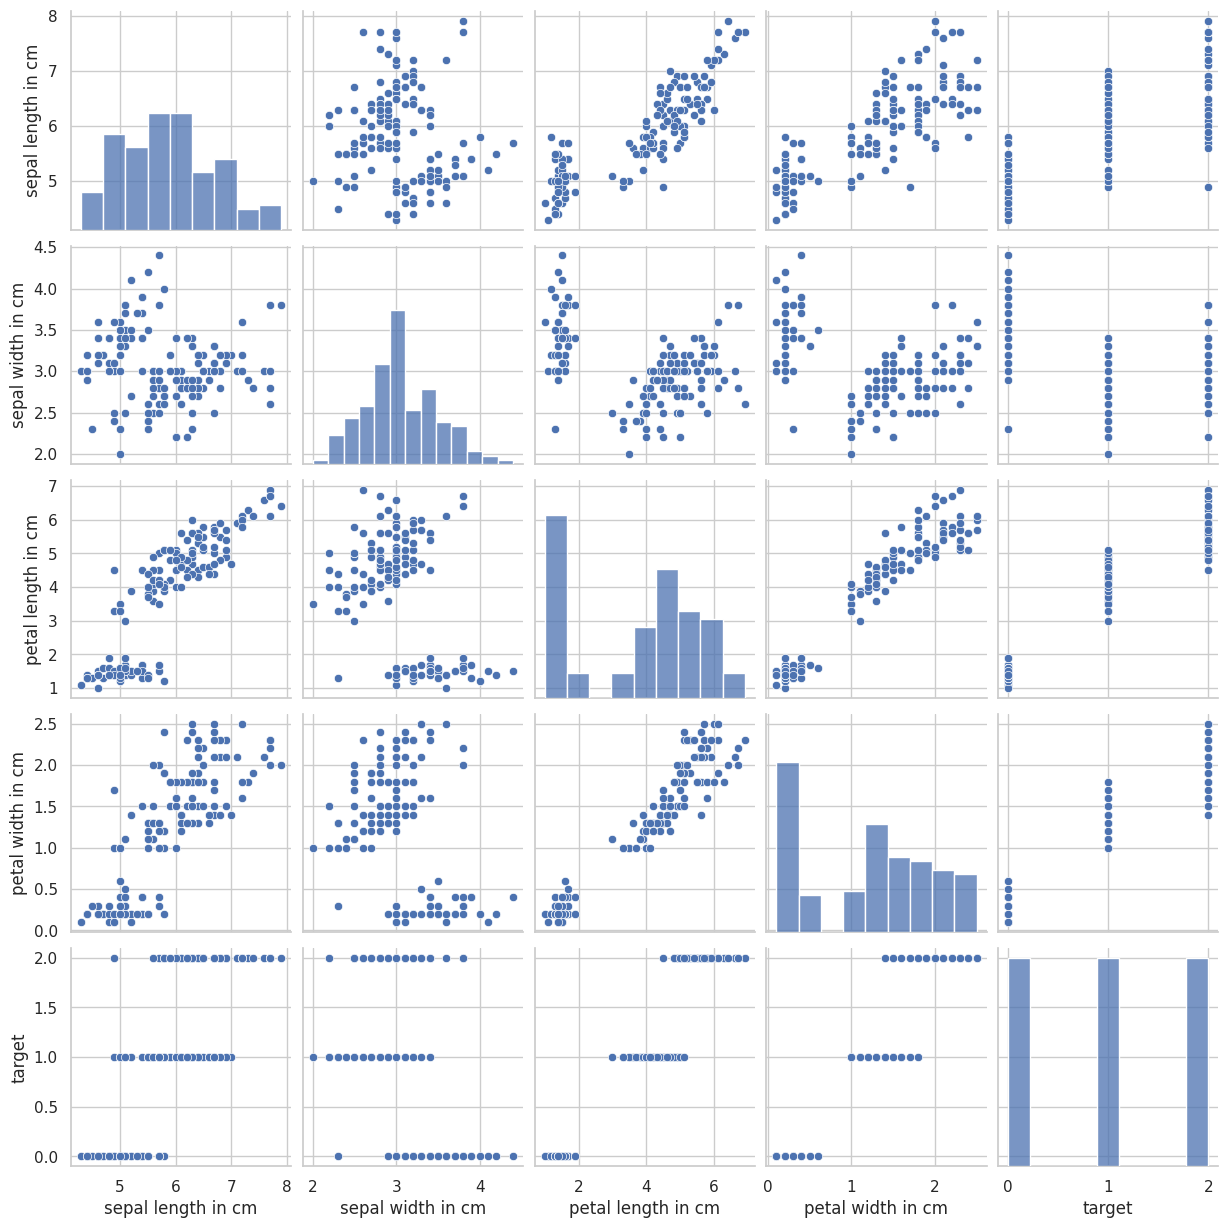

In [ ]:
sns.pairplot(df_iris, height=2.5)
plt.show()

In [ ]:
list(df_iris.columns)

['sepal length in cm',
 'sepal width in cm',
 'petal length in cm',
 'petal width in cm',
 'target',
 'target_name']

Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar un método numérico para poder entender las correlaciones. 

<AxesSubplot: >

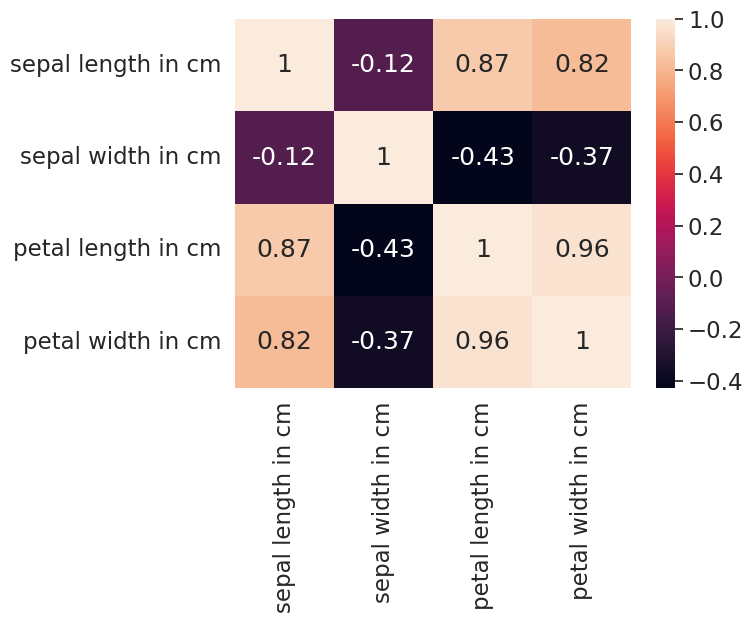

In [ ]:
cols=['sepal length in cm',
 'sepal width in cm',
 'petal length in cm',
 'petal width in cm']
cm = np.corrcoef(df_iris[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols,xticklabels=cols)

## Creando modelo con scikit-learn

In [ ]:

#datos de entrada o variable independiente
X = df_iris['sepal length in cm'].values.reshape(-1,1)
#datos de salida, o variable dependiente
y = df_iris['petal length in cm'].values.reshape(-1,1)

#transformando datos
estandar_x = StandardScaler()
estandar_y = StandardScaler()

X_std = estandar_x.fit_transform(X)
y_std = estandar_y.fit_transform(y)
# Entrenamiento
regresor = LinearRegression()# definiendo el modelo

regresor.fit(X_std, y_std) #entrenamiento

LinearRegression()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df_iris['sepal length in cm'].values.reshape(-1, 1)#-1 es para poner el mismo número de filas originale
y = df_iris['petal length in cm'].values.reshape(-1, 1)#1para que se una sola columna

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

regresor = LinearRegression()
regresor.fit(X_std, y_std)

LinearRegression()

## Análisis de resultados

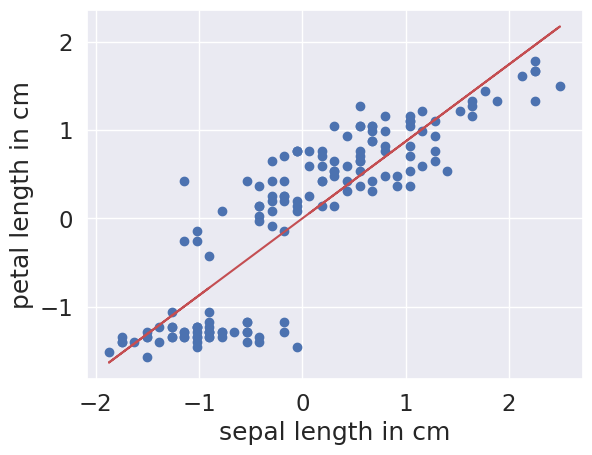

In [ ]:
plt.scatter(X_std,y_std)
plt.plot(X_std,regresor.predict(X_std), color='r')
plt.ylabel("petal length in cm")
plt.xlabel("sepal length in cm")
plt.show()

## Generando predicción con el modelo

In [ ]:
long_sepal = 5 #cm
long_sepal_std = estandar_x.transform(np.array([long_sepal]).reshape(-1,1))
#se aplica transformada inversa
print("La longitud del petalo de una flor con longitud de sepalo 2cm es de ",estandar_y.inverse_transform( regresor.predict(long_sepal_std)))

La longitud del petalo de una flor con longitud de sepalo 2cm es de  [[2.19072152]]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3e4be8b6-6c74-4684-9aa7-992eab9b3282' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>